#### __Data Visualization Python Project__

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
# URL for the 'Travel' category on Books to Scrape
url = "http://books.toscrape.com/catalogue/category/books/travel_2/index.html"
headers = {"User-Agent": "Mozilla/5.0"}

# Send a GET request to the URL
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Select all book containers
books = soup.select("article.product_pod")

# Initialize list to store product details
data_list = []
for book in books:
    
    title = book.select_one("h3 a")["title"] if book.select_one("h3 a") else None
    
    # Price (e.g., "£51.77")
    price = book.select_one("p.price_color").get_text(strip=True) if book.select_one("p.price_color") else None
    
    availability = book.select_one("p.instock.availability").get_text(strip=True) if book.select_one("p.instock.availability") else None
    
    promo = "No Promo"
    
    # Append the data for the book
    data_list.append({
        "product_name": title,
        "category": "Travel",
        "price": price,
        "availability": availability,
        "promotion": promo
    })

# Convert the list to a DataFrame
df = pd.DataFrame(data_list)
print("Raw scraped data:")
print(df.head())

Raw scraped data:
                                        product_name category   price  \
0                            It's Only the Himalayas   Travel  £45.17   
1  Full Moon over Noah’s Ark: An Odyssey to Mount...   Travel  £49.43   
2  See America: A Celebration of Our National Par...   Travel  £48.87   
3  Vagabonding: An Uncommon Guide to the Art of L...   Travel  £36.94   
4                               Under the Tuscan Sun   Travel  £37.33   

  availability promotion  
0     In stock  No Promo  
1     In stock  No Promo  
2     In stock  No Promo  
3     In stock  No Promo  
4     In stock  No Promo  


In [14]:
df["price"] = df["price"].str.replace("£", "").astype(float)

df["availability"] = df["availability"].str.replace("In stock", "Available").str.strip()

df["product_name"] = df["product_name"].str.title().str.strip()

print("\nCleaned data:")
print(df.head())


Cleaned data:
                                        product_name category  price  \
0                            It'S Only The Himalayas   Travel  45.17   
1  Full Moon Over Noah’S Ark: An Odyssey To Mount...   Travel  49.43   
2  See America: A Celebration Of Our National Par...   Travel  48.87   
3  Vagabonding: An Uncommon Guide To The Art Of L...   Travel  36.94   
4                               Under The Tuscan Sun   Travel  37.33   

  availability promotion  
0    Available  No Promo  
1    Available  No Promo  
2    Available  No Promo  
3    Available  No Promo  
4    Available  No Promo  


In [15]:
# Calculate the average price in the category
avg_price = df["price"].mean()
print(f"\nAverage price for 'Travel' category books: £{avg_price:.2f}")

# Count of products available (basic summary of availability)
availability_counts = df["availability"].value_counts()
print("\nAvailability Counts:")
print(availability_counts)


Average price for 'Travel' category books: £39.79

Availability Counts:
availability
Available    11
Name: count, dtype: int64


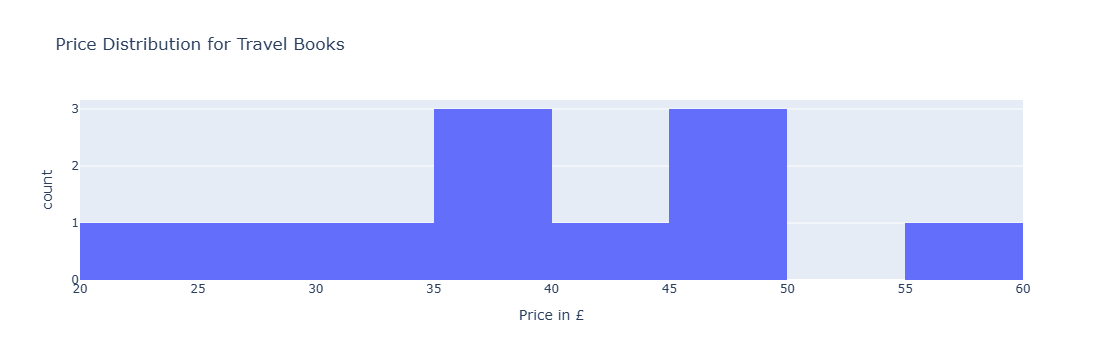

In [16]:
import plotly.express as px

fig = px.histogram(
    df, 
    x="price", 
    nbins=10, 
    title="Price Distribution for Travel Books",
    labels={'price': 'Price in £'},
)
fig.show()

In [17]:
df.to_csv("books_to_scrape_travel.csv", index=False)
print("\n Saved: books_to_scrape_travel.csv")


 Saved: books_to_scrape_travel.csv
